In [225]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from heapq import heappush, heappop
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix


Q1.

In [226]:
train_data = pd.read_csv("occupancy_train.txt")  
test_data = pd.read_csv("occupancy_test.txt")

features = ["Humidity", "Light", "HumidityRatio"]
target = "Occupancy"

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Run KNN for K=1 to 10
accuracies = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    correct = 0
    total = len(y_test)
    for i in range(total):
        if y_pred[i] == y_test.iloc[i]:
            correct += 1
    acc = correct / total
    accuracies.append(acc)
    
    print(f"Accuracy for K={k}: {acc*100:.2f}%")

# Find the highest accuracy and corresponding K
max_acc = max(accuracies)
best_k = accuracies.index(max_acc) + 1
print(f"\nHighest Accuracy: {max_acc*100:.2f}% at K={best_k}")

Accuracy for K=1: 94.03%
Accuracy for K=2: 92.53%
Accuracy for K=3: 95.72%
Accuracy for K=4: 94.48%
Accuracy for K=5: 95.53%
Accuracy for K=6: 95.27%
Accuracy for K=7: 96.32%
Accuracy for K=8: 96.14%
Accuracy for K=9: 96.47%
Accuracy for K=10: 96.47%

Highest Accuracy: 96.47% at K=9


Q2.

In [227]:
iris = load_iris()
X = iris.data    
y = iris.target 

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=48
)

# Chi-Squared distance
def chi_squared_distance(x, y):
    distance = 0.0
    for xi, yi in zip(x, y):
        if xi + yi != 0:
            distance += (xi - yi)**2 / (xi + yi)
    return distance

class MyKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            heap = []
            for train_point, label in zip(self.X_train, self.y_train):
                dist = chi_squared_distance(test_point, train_point)
                heappush(heap, (dist, label))
            k_neighbors = [heappop(heap)[1] for _ in range(self.k)]
            most_common = Counter(k_neighbors).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

# Train and predict
k = 5
knn = MyKNN(k=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy using sklearn
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Confusion matrix
def confusion_matrix(y_true, y_pred):
    labels = np.unique(y_true)
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for t, p in zip(y_true, y_pred):
        matrix[t][p] += 1
    return matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 90.00%

Confusion Matrix:
[[ 9  0  0]
 [ 0  8  3]
 [ 0  0 10]]


Q3.

In [228]:
df = pd.read_csv("cancer_patient.csv")

# EDA
print("Dataset shape:", df.shape)
print("\nData info:")
df.info()
print()
df.describe()

Dataset shape: (1000, 26)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null  

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


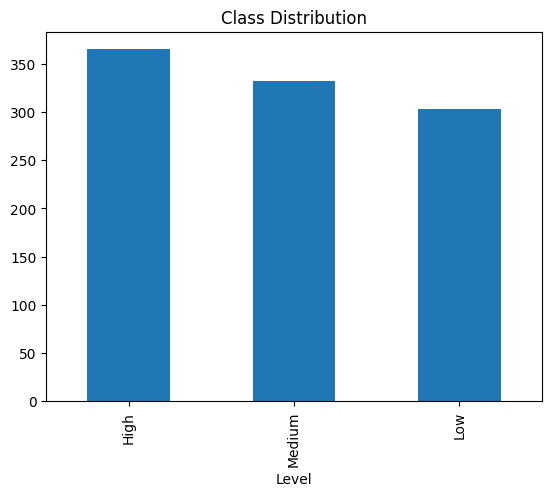

In [229]:
# Check target balance
print(df['Level'].value_counts())
df['Level'].value_counts().plot(kind='bar', title='Class Distribution');

Dataset appears to be balanced

In [230]:
# Check missing values, duplicates, categorical features

# Missing values
print("Missing Values:", df.isnull().sum().sum())

# Duplicate records
print("Duplicate rows:", df.duplicated().sum())

# Categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Missing Values: 0
Duplicate rows: 0
Categorical columns: Index(['Patient Id', 'Level'], dtype='object')


No duplicates or missing values.

<Axes: >

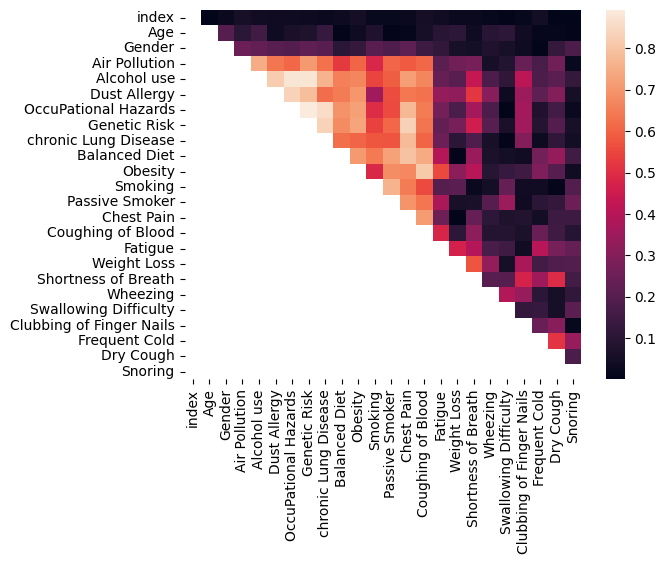

In [231]:
# Correlation and Feature Selection
abs_corr = df.corr(numeric_only=True).abs()
upper = abs_corr.where(
  np.triu(np.ones(abs_corr.shape), k=1).astype(bool)
)
sns.heatmap(upper)

In [232]:
# Feature Scaling
X = df.iloc[:, 2:-1]   
y = df.iloc[:, -1]    

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [233]:
# Split dataset: 80% train, 20% test
X = df.drop(['Level','Patient Id','index'], axis=1)
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Split training further: 70% train, 30% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0
)

print("Training set shape:", X_train_final.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (560, 23)
Validation set shape: (240, 23)
Test set shape: (200, 23)


The validation set is used to fine tune the model, adjust hyperparameters (like the value of k in KNN), and prevent overfitting.

In [234]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize KNN (Euclidean distance)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_final, y_train_final)

# Predictions
y_train_pred = knn.predict(X_train_final)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train_final, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

Training Accuracy: 0.9964285714285714
Validation Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
 [[75  0  0]
 [ 0 67  0]
 [ 0  0 58]]


In [235]:
# Compare different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski'] 
results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_final, y_train_final)
    
    # Training accuracy
    train_pred = knn.predict(X_train_final)
    train_acc = accuracy_score(y_train_final, train_pred)
    
    # Validation accuracy
    val_pred = knn.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    # Test accuracy
    test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    
    results.append([metric, train_acc, val_acc, test_acc])

# Put into dataframe for easy comparison
import pandas as pd
results_df = pd.DataFrame(results, columns=["Metric", "Training", "Validation", "Testing"])
print("\nComparison Table:")
print(results_df)



Comparison Table:
      Metric  Training  Validation  Testing
0  euclidean  0.996429         1.0      1.0
1  manhattan  1.000000         1.0      1.0
2  minkowski  0.996429         1.0      1.0
